<a href="https://colab.research.google.com/github/Sunilparlacharla/Deep_Learing/blob/main/ANN_18DEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [64]:
tf.__version__

'2.9.2'

In [65]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
## Divide the dataset into independent and dependent features

X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [67]:
## Ferature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [68]:
X=X.drop(['Geography','Gender'],axis=1)

In [69]:
X=pd.concat([X,geography,gender],axis=1) 

In [70]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [71]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [72]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [73]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [74]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [75]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [76]:
### Lets initialize the ANN
classifier=Sequential()

In [77]:
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [78]:
classifier

In [79]:
# adding the first hidden layer
classifier.add(Dense(units=10,activation='relu'))
classifier.add(Dropout(0.2))

In [80]:
##adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
classifier.add(Dropout(0.3))

In [81]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [82]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                120       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable 

In [83]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [85]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
   
)

In [86]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4560 - accuracy: 0.7956 - val_loss: 0.4055 - val_accuracy: 0.7975
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4207 - accuracy: 0.7960 - val_loss: 0.3902 - val_accuracy: 0.7975
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4085 - accuracy: 0.8020 - val_loss: 0.3867 - val_accuracy: 0.8390
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4103 - accuracy: 0.8199 - val_loss: 0.3758 - val_accuracy: 0.8220
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3964 - accuracy: 0.8438 - val_loss: 0.3801 - val_accuracy: 0.8480
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3989 - accuracy: 0.8465 - val_loss: 0.3838 - val_accuracy: 0.8465
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4016 - accuracy: 0.8388 - val_loss: 0.3763 - val_accuracy: 0.8595

In [87]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

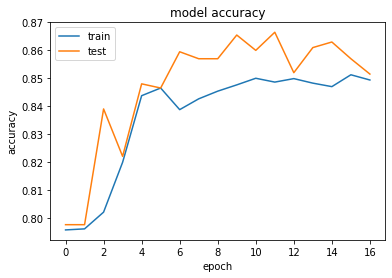

In [88]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

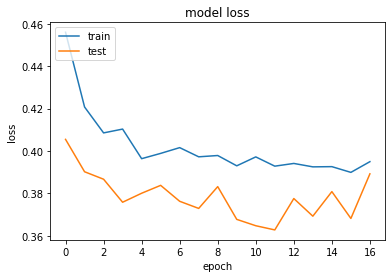

In [89]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [91]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1478,  117],
       [ 180,  225]])

In [92]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8515

In [93]:
##get the weights
classifier.get_weights()

[array([[ 2.42305979e-01,  1.45577267e-01,  2.09017217e-01,
         -1.78414613e-01, -2.28520520e-02,  3.88336331e-01,
          8.37920830e-02, -1.49632514e-01,  3.01551539e-02,
         -9.08657834e-02],
        [-5.23218870e-01,  1.69993722e+00, -8.55573118e-01,
         -1.57774448e-01,  4.39785756e-02, -9.08815682e-01,
         -2.99650729e-01, -2.27220988e+00, -8.64465654e-01,
          1.60275710e+00],
        [ 1.07444274e+00,  3.23496349e-02,  7.75200546e-01,
         -2.26297006e-01,  5.37983216e-02, -1.80687442e-01,
         -1.20724946e-01, -1.90396924e-02, -1.52233720e-01,
         -2.92969555e-01],
        [-3.88122350e-01, -5.73023677e-01, -1.26818430e+00,
          5.85249722e-01, -2.60939837e+00, -1.60674107e+00,
          8.91803324e-01, -8.46976042e-01, -1.30659568e+00,
          3.16006005e-01],
        [ 4.97274041e-01,  9.51349735e-03,  3.27218026e-01,
          3.16439939e+00, -2.87911201e+00, -6.36934221e-01,
          8.22749257e-01,  3.63720357e-01,  1.094917

In [94]:
## Saving h5 file
classifier.save('model.h5')

In [95]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [96]:
classifier1.predict(X_test)

63/63 [==============================] - 0s 2ms/step


array([[0.45733526],
       [0.3336346 ],
       [0.3235581 ],
       ...,
       [0.4132478 ],
       [0.37738255],
       [0.38061464]], dtype=float32)

In [97]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [101]:
## Regression
## Divide the dataset into independent and dependent features

X1=df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited']]
y1=df.iloc[:,12]

In [102]:
## Ferature Engineering 
geography=pd.get_dummies(X1['Geography'],drop_first=True)
gender=pd.get_dummies(X1['Gender'],drop_first=True)
## concatenate these variables with dataframe
X1=X1.drop(['Geography','Gender'],axis=1)
X1=pd.concat([X1,geography,gender],axis=1) 
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)

#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X1_train=sc.fit_transform(X_train)
X1_test=sc.transform(X_test)

### Lets initialize the ANN
regressor=Sequential()
## Adding the input Layer and first hidden layer
regressor.add(Dense(10,input_shape=(11,),activation='relu'))


# adding the first hidden layer
regressor.add(Dense(units=10,activation='relu'))
regressor.add(Dropout(0.2))

##adding the second hidden layer
regressor.add(Dense(units=10,activation='relu'))
regressor.add(Dropout(0.3))

##  Adding the output layer
regressor.add(Dense(1))


In [103]:
regressor.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                120       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable 

In [104]:
mse=tf.keras.losses.MeanSquaredError(
    name='mean_squared_error'
)
metrics=tf.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [105]:
regressor.compile(optimizer=opt,loss=mse,metrics=['mae'])

## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="mae",
    patience=15
   
)

In [106]:
model_history1=regressor.fit(X1_train,y1_train,validation_data=(X1_test,y1_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 3472937984.0000 - mae: 40503.4102 - val_loss: 231682704.0000 - val_mae: 13593.6748
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 1163105536.0000 - mae: 24914.3828 - val_loss: 211447712.0000 - val_mae: 13325.9248
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 1150468992.0000 - mae: 24672.0293 - val_loss: 116613784.0000 - val_mae: 9759.7881
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 1123281280.0000 - mae: 24334.6172 - val_loss: 111698912.0000 - val_mae: 9444.1484
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 1086020608.0000 - mae: 23708.7852 - val_loss: 205291152.0000 - val_mae: 12892.8770
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 1094113664.0000 - mae: 23921.0430 - val_loss: 105106400.0000 - val_mae: 8784.6143
Epoch 7/100
800/800 [==============================] - 

In [107]:
y_pred=regressor.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [108]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

-77155794138.05208
